In [37]:
### Import required packages
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [38]:
### Load student pass/fail data into Pandas
### Import raw data from GitHub
url = 'https://raw.githubusercontent.com/sgus1318/glossy-chromosome/master/student_data2.csv'
df = pd.read_csv(url)

## View raw data
df.head()

,Male,Parent_Apart,Medu,Fedu,studytime,Fam_Sup,Activities,College_Bound,Internet_Access,Dalc,Walc,health,absences,Final_Fail
0,0,1,4,4,2,0,0,1,0,1,1,3,4,1
1,0,0,1,1,2,1,0,1,1,1,1,3,2,1
2,0,0,1,1,2,0,0,1,1,2,3,3,6,1
3,0,0,4,2,3,1,1,1,1,1,1,5,0,0
4,0,0,3,3,2,1,0,1,0,1,2,5,0,0


In [39]:
### Write an apply function that transforms the absences column into a proportion of total schooldays (93 total days)
def divide_by_93(x):
    """Divides by 93"""""
    return x/93
df['Absent_Percentage']=df[['absences']].apply(divide_by_93)
df.head()

,Male,Parent_Apart,Medu,Fedu,studytime,Fam_Sup,Activities,College_Bound,Internet_Access,Dalc,Walc,health,absences,Final_Fail,Absent_Percentage
0,0,1,4,4,2,0,0,1,0,1,1,3,4,1,0.043011
1,0,0,1,1,2,1,0,1,1,1,1,3,2,1,0.021505
2,0,0,1,1,2,0,0,1,1,2,3,3,6,1,0.064516
3,0,0,4,2,3,1,1,1,1,1,1,5,0,0,0.000000
4,0,0,3,3,2,1,0,1,0,1,2,5,0,0,0.000000


In [40]:
df['Final_Fail'].value_counts()

1    373
0    276
Name: Final_Fail, dtype: int64

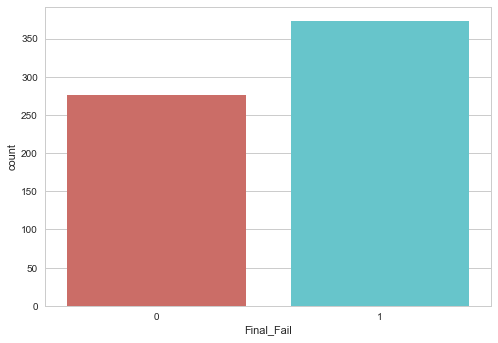

In [5]:
sns.countplot(x='Final_Fail',data=df,palette='hls')
plt.show()
plt.savefig('count_plot')

(array([ 373.,  154.,   52.,   38.,   11.,   13.,    4.,    1.,    1.,    2.]),
 array([  0. ,   3.2,   6.4,   9.6,  12.8,  16. ,  19.2,  22.4,  25.6,
         28.8,  32. ]),
 <a list of 10 Patch objects>)

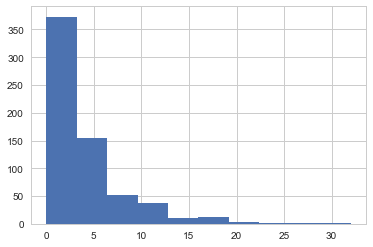

In [41]:
plt.hist(sf['absences'])

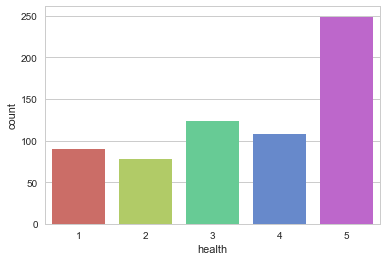

In [42]:
sns.countplot(x='health',data=df,palette='hls')
plt.show()
plt.savefig('health_plot')

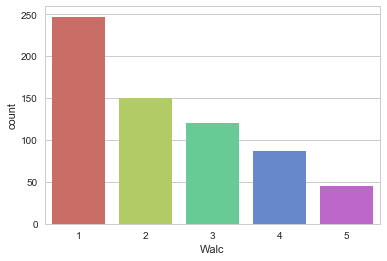

In [43]:
sns.countplot(x='Walc',data=df,palette='hls')
plt.show()
plt.savefig('WeeklyAlcConsumption_plot')

In [44]:
###compare pass (0) and fail (1) across each variable

df.groupby('Final_Fail').mean()

,Male,Parent_Apart,Medu,Fedu,studytime,Fam_Sup,Activities,College_Bound,Internet_Access,Dalc,Walc,health,absences,Absent_Percentage
Final_Fail,,,,,,,,,,,,,,
0,0.336957,0.130435,2.840580,2.557971,2.148551,0.626812,0.521739,0.992754,0.836957,1.271739,2.003623,3.318841,2.836957,0.030505
1,0.463807,0.117962,2.273458,2.120643,1.769437,0.603217,0.458445,0.820375,0.715818,1.672922,2.485255,3.697051,4.268097,0.045894


In [45]:
cols=["Male","Parent_Apart","Medu","Fedu","studytime","Fam_Sup","Activities","College_Bound","Internet_Access","Dalc","Walc","health","absences"] 
X=df[cols]
Y=df["Final_Fail"]

In [46]:
import statsmodels.api as sm
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.578512
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Final_Fail   No. Observations:                  649
Model:                          Logit   Df Residuals:                      636
Method:                           MLE   Df Model:                           12
Date:                Thu, 04 Jan 2018   Pseudo R-squ.:                  0.1517
Time:                        17:02:05   Log-Likelihood:                -375.45
converged:                       True   LL-Null:                       -442.58
                                        LLR p-value:                 8.656e-23
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Male                0.4018      0.198      2.032      0.042       0.014       0.789
Parent_Apart  

In [47]:
###remove variables which are insignificant at the 0.05 alpha level

cols2=["Male","Medu","College_Bound","Dalc","health","absences"] 
X=df[cols2]
Y=df["Final_Fail"]

In [48]:
### Final Model
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.585259
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Final_Fail   No. Observations:                  649
Model:                          Logit   Df Residuals:                      643
Method:                           MLE   Df Model:                            5
Date:                Thu, 04 Jan 2018   Pseudo R-squ.:                  0.1418
Time:                        17:02:10   Log-Likelihood:                -379.83
converged:                       True   LL-Null:                       -442.58
                                        LLR p-value:                 2.158e-25
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Male              0.4172      0.188      2.214      0.027       0.048       0.786
Medu             -0.

In [49]:
## Students are less likely to fail if they're femaile, their mothers have higher education,
## if they're intending to apply to college, if they consume less alcohol, and if they don't miss much school.
## Interestingly, students who failed in this sample were rated as healthier than students who passed.